In [9]:
import numpy as np
import seaborn as sns
from cwgp.cwgp import CWGP
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
exp = np.random.exponential(scale=5, size=100)
compgp = CWGP("sa", n=3)
compgp.fit(exp)
params = compgp.phi.res.x

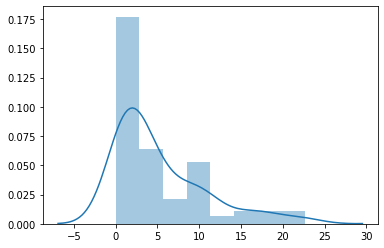

In [4]:
sns.distplot(exp)

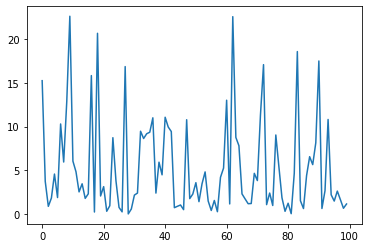

In [7]:
sns.lineplot(np.arange(100),exp)

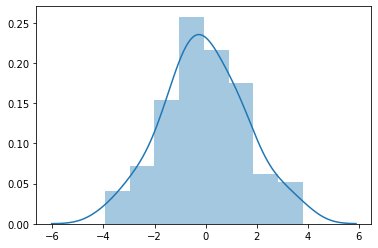

In [3]:
t_exp, d = compgp.phi.comp_phi(params, exp)
sns.distplot(t_exp)

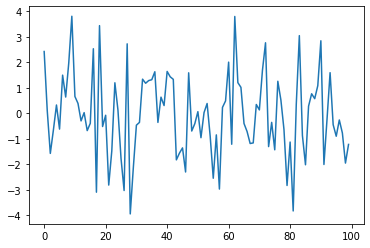

In [8]:
sns.lineplot(np.arange(100),t_exp)

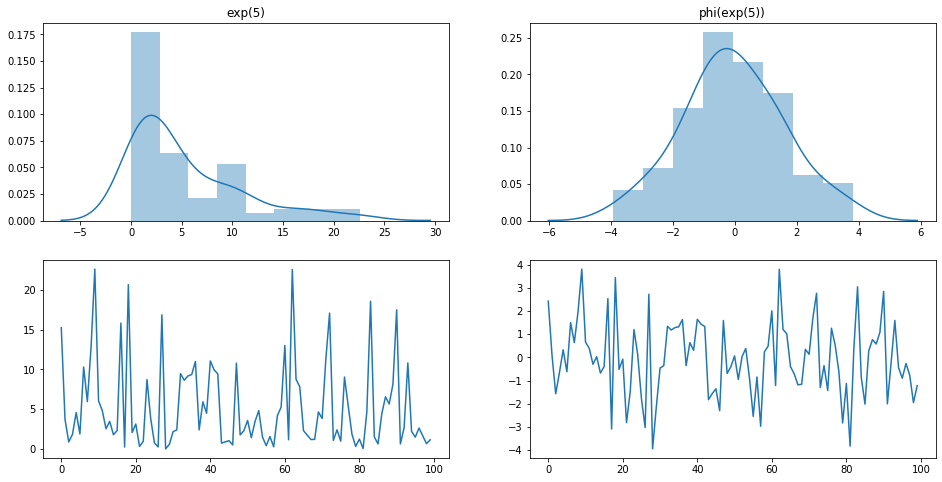

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))
sns.distplot(exp,ax=ax[0,0])
ax[0,0].set_title("exp(5)")
sns.distplot(t_exp,ax=ax[0,1])
ax[0,1].set_title("phi(exp(5))")
sns.lineplot(np.arange(100), exp,ax=ax[1,0])
sns.lineplot(np.arange(100), t_exp,ax=ax[1,1])